In [1]:

import numpy as np

global Pref, Pmin, Pth, D, Prest
Pref = 0
Prest = 0

Pmin = -1
Pth = 6 #Should be Pth = 6 for deterministic spike train 140
D = 0.5

class neuron:
	def __init__(self):
		self.Pth = Pth
		self.t_ref = 4
		self.t_rest = -1
		self.P = Prest
		self.D = D
		self.Pmin = Pmin
		self.Prest = Prest
	#Check if membrane potential has crossed the thresold value
	def check(self):
		if self.P>= Pth:
			self.P = Pref
			return 1
		elif self.P < Pmin:
			self.P  = Prest
			return 0
		else:
			return 0
	#Lateral Inhibition
	def inhibit(self):
		self.P  = Pmin
	def initial(self):
		self.t_rest = -1
		self.P = Prest


In [28]:
w = [[-0.5,-0.125,  0.25,  -0.125, -0.5  ],[-0.125 , 0.25  , 0.625 , 0.25 , -0.125],[ 0.25   ,0.625 , 1. ,    0.625 , 0.25 ],	 [-0.125 , 0.25  , 0.625 , 0.25,  -0.125],	 [-0.5  , -0.125 , 0.25 , -0.125 ,-0.5  ]]
sum(sum(np.array(w)))

2.5

In [2]:

#RECEPTIVE FIELD

import numpy as np

def rf(inp):
	w = [[-0.5,-0.125,  0.25,  -0.125, -0.5  ],
	 [-0.125 , 0.25  , 0.625 , 0.25 , -0.125],
	 [ 0.25   ,0.625 , 1. ,    0.625 , 0.25 ],
	 [-0.125 , 0.25  , 0.625 , 0.25,  -0.125],
	 [-0.5  , -0.125 , 0.25 , -0.125 ,-0.5  ]]
	pot = np.zeros([28,28])
	ran = [-2,-1,0,1,2]
	ox = 2
	oy = 2

	#Convolution
	for i in range(28):
		for j in range(28):
			summ = 0
			for m in ran:
				for n in ran:
					if (i+m)>=0 and (i+m)<=15 and (j+n)>=0 and (j+n)<=15:
						summ = summ + w[ox+m][oy+n]*inp[i+m][j+n]/255
			pot[i][j] = summ
	return pot

# if __name__ == '__main__':

# 	maxx = -1000
# 	minn = 1000

# 	for j in range(1,1500):
# 		img = cv2.imread("images/" + str(j) + ".png", 0)
# 		pot = rf(img)
# 		for c in pot:
# 			if max(c)>maxx:
# 				maxx=  max(c)
# 			if min(c)<minn:
# 				minn = min(c)

# 	print maxx, minn


In [5]:

# ENCODER

import numpy as np
from numpy import interp

import random

import imageio
import math
from sklearn.preprocessing import normalize

# Builds a probabilistic spike train
def encode_stochastic(img):
	T = 200
	train = []
	pot1 = normalize(img, norm='l2')
	for l in range(28):
		for m in range(28):
			temp = np.random.uniform(size=(T+1))
			temp = (temp < pot1[l][m])
			train.append(temp)
	return train

def encode_deterministic(pot):
	#defining time frame of 1s with steps of 5ms
	T = 200;
	#initializing spike train
	train = []

	for l in range(28):
		for m in range(28):
			temp = np.zeros([(T+1),])
			#calculating firing rate proportional to the membrane potential
			freq = interp(pot[l][m], [-2,5], [1,20])
			# print freq
			if freq>0:
				freq1 = math.ceil(T/freq)
				#generating spikes according to the firing rate
				k = freq1
				while k<(T+1):
					temp[int(k)] = 1
					k = k + freq1
			train.append(temp)
			# print sum(temp)
	return train


if __name__  == '__main__':
	m = []
	n = []
	path = "/Users/serdar/Documents/python/test1/Spiking-Neural-Network/classification/training_images/1.png"
	path = r"C:\Users\dellCTA\Documents\Python Scripts\mak_yolu\media\1.png"
	img = imageio.imread(path)
	# pot = rf(img)
	# train = encode_deterministic(pot)
	# print train
	# print img
	encode_stochastic(img)
m = []
n = []
img = imageio.imread(path)
pot = rf(img)
train = encode_deterministic(pot)
#print(train)
#print(img)
st_train = encode_stochastic(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  12 136 254 255 195 115
    3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6 175 253 196 160 252 253
   15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 130 253 234   4   0  27 205
  232  40   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  54 246 253  68   0   

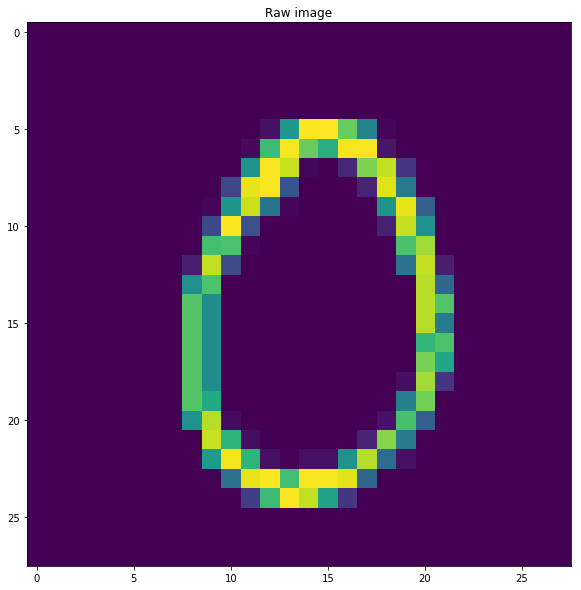

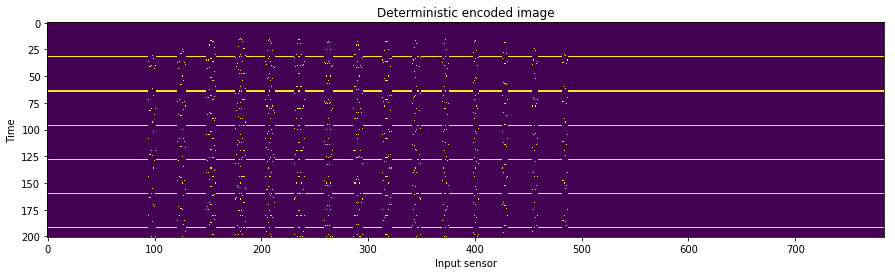

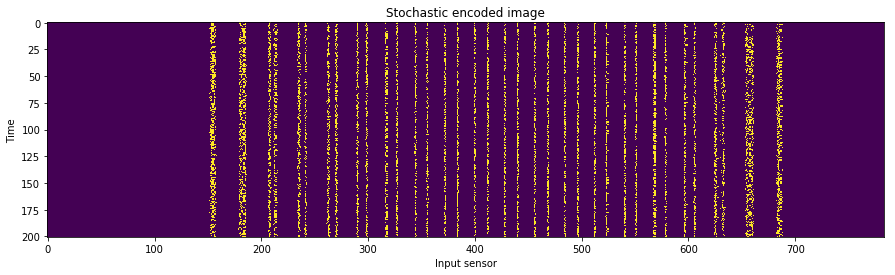

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
print(img)
#image
plt.imshow(img)
plt.title("Raw image")

plt.show()

#spikes deterministic
plt.imshow(np.transpose(train))
plt.title("Deterministic encoded image")
plt.xlabel("Input sensor")
plt.ylabel("Time")
plt.show()
#spikes stochastic
plt.imshow(np.transpose(st_train))
plt.title("Stochastic encoded image")
plt.xlabel("Input sensor")
plt.ylabel("Time")
plt.show()


6
784


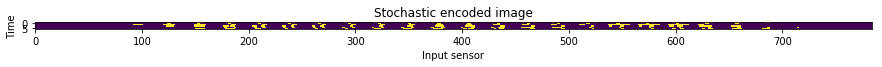

In [11]:
################################ README ########################################
# This file is used to initialize the network with trained weights.'image_names'
# consists of names of the images that are needed to be read.
################################################################################

# WEIGHT INITIALIZATION

import numpy as np
import imageio

def learned_weights():
	image_names = ["1", "2", "3", "4", "5", "6"]
	ans = []
	for image in image_names:
		temp = []
		path = r"C:\Users\dellCTA\Documents\Python Scripts\mak_yolu\media\\"+image+".png"
		img = imageio.imread(path)
		for i in img:
			for j in i:
				if(j==0):
					temp.append(-0.7)
				else:
					temp.append(1)
		ans.append(temp)
	return ans

if __name__ == '__main__':
	a = learned_weights()
	print(len(a))
	print(len(a[1]))
	plt.imshow((a))
	plt.title("Stochastic encoded image")
	plt.xlabel("Input sensor")
	plt.ylabel("Time")
	plt.show()

[25.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 1.0]
[0.0, 22.0, 5.0, 3.0, 0.0, 0.0, 1.0, 1.0]
[0.0, 0.0, 26.0, 7.0, 0.0, 0.0, 0.0, 2.0]
[0.0, 0.0, 11.0, 25.0, 0.0, 13.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 7.0, 23.0, 0.0, 1.0, 2.0]
[12.0, 0.0, 0.0, 16.0, 0.0, 25.0, 0.0, 0.0]


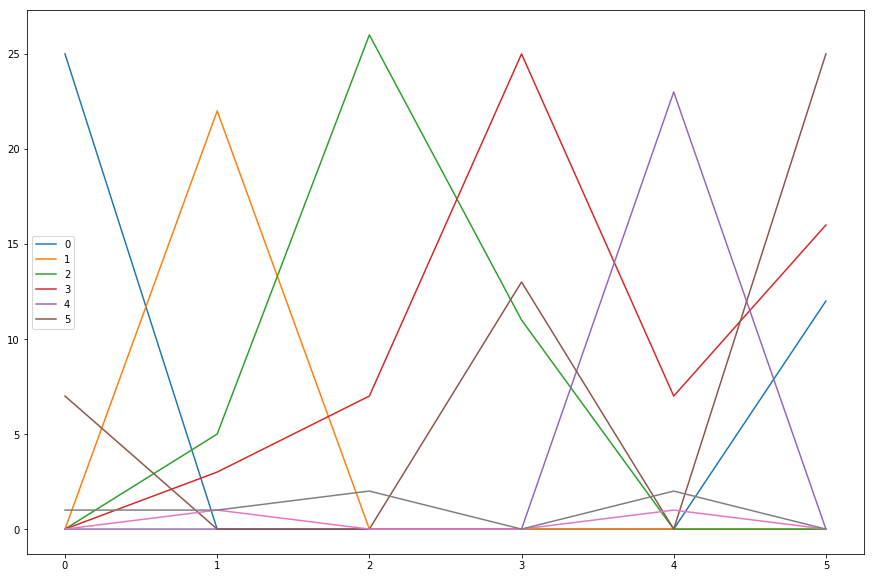

In [24]:

# Parameters
global time, T, dt, t_back, t_fore, w_min
T = 200
time = np.arange(1, T + 1, 1)

t_back = -20
t_fore = 20
Pth = 150  # Should be Pth = 6 for deterministic spike train
m = 784  # Number of neurons in first layer
n = 8  # Number of neurons in second layer
epoch = 1
num_of_images = 6
w_max = 0.5
w_min = -0.5

layer2 = []
# creating the hidden layer of neurons
for i in range(n):
    a = neuron()
    layer2.append(a)

# synapse matrix
synapse = np.zeros((n, m))
# learned weights
weight_matrix = learned_weights()
for i in range(num_of_images):
    synapse[i] = weight_matrix[i]

# random initialization for rest of the synapses
for i in range(num_of_images, n):
    for j in range(m):
        synapse[i][j] = random.uniform(w_min, w_max)

results= []
for k in range(epoch):
    for i in range(1, 7):
        spike_count = np.zeros((n, 1))

        # read the image to be classified
        path = r"C:\Users\dellCTA\Documents\Python Scripts\mak_yolu\media\\"+str(i)+".png"
        img = imageio.imread(path)

        # initialize the potentials of output neurons
        for x in layer2:
            x.initial()

        # calculate teh membrane potentials of input neurons
        pot = rf(img)

        # generate spike trains. Select between deterministic and stochastic
        #train = np.array(encode_deterministic(pot))
        train = np.array(encode_stochastic(img))

        # flag for lateral inhibition
        f_spike = 0
        active_pot = np.zeros((n, 1))
        for t in time:
            for j, x in enumerate(layer2):
                active = []

                # update potential if not in refractory period
                if (x.t_rest < t):
                    x.P = x.P + np.dot(synapse[j], train[:, t])
                    if (x.P > x.Prest):
                        x.P -= x.D
                    active_pot[j] = x.P

            # Lateral Inhibition
            if (f_spike == 0):
                high_pot = max(active_pot)
                if (high_pot > Pth):
                    f_spike = 1
                    winner = np.argmax(active_pot)
                    for s in range(n):
                        if (s != winner):
                            layer2[s].P = layer2[s].Pmin

            # Check for spikes
            for j, x in enumerate(layer2):
                s = x.check()
                if (s == 1):
                    spike_count[j] += 1
                    x.t_rest = t + x.t_ref
        a = []
        for i in spike_count:
            # print(i,)
            a.append((i[0]))
        print(a)
        results.append(a)
    
plt.plot(results)
plt.legend(["0","1","2","3","4","5"])
    
    # print( i , list(spike_count),)